In [69]:
#set up dependencies and read csv files
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import os

happiness_data = pd.read_csv('Resources/happiness/happiness_ranking2015.csv')
cellular_data = pd.read_csv('Resources/tech/cellular_subscription_data.csv')
internet_data = pd.read_csv('Resources/tech/internet_users_data.csv')
population_data = pd.read_csv('Resources/tech/population.csv')
population_data

,Country Name,Country Code,Total Population
0,Afghanistan,AFG,33736494
1,Albania,ALB,2880703
2,Algeria,DZA,39871528
3,American Samoa,ASM,55537
4,Andorra,AND,78014
5,Angola,AGO,27859305
6,Antigua and Barbuda,ATG,99923
7,Argentina,ARG,43417765
8,Armenia,ARM,2916950
9,Aruba,ABW,104341


In [70]:
#clean, merge, and organize tech data
tech_data = pd.merge(cellular_data, internet_data, on='Country Code', how='outer')
del tech_data['Country Name_y']
cleaned_tech_data = tech_data.rename(columns={'Country Name_x': 'Country'})
cleaned_tech_data['Total Cellular Subscriptions'].replace('', np.nan, inplace=True)
cleaned_tech_data['% of Internet Users'].replace('', np.nan, inplace=True)
cleaned_tech_data.dropna(subset=['Total Cellular Subscriptions'], inplace=True)
cleaned_tech_data.dropna(subset=['% of Internet Users'], inplace=True)
cleaned_tech_data['Total Cellular Subscriptions'] = cleaned_tech_data['Total Cellular Subscriptions'].astype(int)
cleaned_tech_data.head()

,Country,Country Code,Total Cellular Subscriptions,% of Internet Users
0,Aruba,ABW,141000,88.66
1,Afghanistan,AFG,19709038,8.26
2,Angola,AGO,13884532,12.40
3,Albania,ALB,3400955,63.25
4,Andorra,AND,71336,96.91


In [79]:
completed_data = pd.merge(cleaned_tech_data, population_data, on='Country Code', how='left')
del completed_data['Country Name']
completed_data['Total Population'].replace('', np.nan, inplace=True)
completed_data.dropna(subset=['Total Population'], inplace=True)
completed_data['Total Cellular Subscriptions'] = pd.to_numeric(completed_data['Total Cellular Subscriptions'], errors='coerce')
completed_data['Total Population'] = pd.to_numeric(completed_data['Total Population'], errors='coerce')
completed_data['Cellular Subscriptions per Citizen'] = completed_data['Total Cellular Subscriptions'].div(completed_data['Total Population'])
completed_data

,Country,Country Code,Total Cellular Subscriptions,% of Internet Users,Total Population,Cellular Subscriptions per Citizen
0,Aruba,ABW,141000,88.66,1.043410e+05,1.351338
1,Afghanistan,AFG,19709038,8.26,3.373649e+07,0.584205
2,Angola,AGO,13884532,12.40,2.785930e+07,0.498380
3,Albania,ALB,3400955,63.25,2.880703e+06,1.180599
4,Andorra,AND,71336,96.91,7.801400e+04,0.914400
6,United Arab Emirates,ARE,17942560,90.50,9.154302e+06,1.960014
7,Argentina,ARG,61842011,68.04,4.341776e+07,1.424348
8,Armenia,ARM,3464490,59.10,2.916950e+06,1.187710
9,Antigua and Barbuda,ATG,176000,70.00,9.992300e+04,1.761356
10,Australia,AUS,25770000,84.56,2.385078e+07,1.080468


In [84]:
combined_data = pd.merge(happiness_data, completed_data, on='Country Code', how='left')
del combined_data['Unnamed: 0']
del combined_data['Country_y']
del combined_data['Short Name']
del combined_data['Lat']
del combined_data['Lng']
del combined_data['Health (Life Expectancy)']
tech_vs_happiness_data = combined_data.rename(columns={'Country_x': 'Country'})
tech_vs_happiness_data.dropna(subset=['Total Cellular Subscriptions'], inplace=True)
tech_vs_happiness_data.dropna(subset=['% of Internet Users'], inplace=True)
tech_vs_happiness_data['Total Cellular Subscriptions'] = tech_vs_happiness_data['Total Cellular Subscriptions'].astype(int)
tech_vs_happiness_data['Total Population'] = tech_vs_happiness_data['Total Population'].astype(int)
tech_vs_happiness_data.head(10)

,Country,Happiness Score,Happiness Rank,Country Code,Total Cellular Subscriptions,% of Internet Users,Total Population,Cellular Subscriptions per Citizen
0,Switzerland,7.587,1,CHE,11243210,87.48,8282396,1.357483
1,Iceland,7.561,2,ISL,383919,98.20,330815,1.160525
2,Denmark,7.527,3,DNK,7079249,96.33,5683483,1.245583
3,Norway,7.522,4,NOR,5714890,96.81,5190239,1.101084
4,Canada,7.427,5,CAN,29765000,88.47,35832513,0.830670
5,Finland,7.406,6,FIN,7396200,86.42,5479531,1.349787
6,Netherlands,7.378,7,NLD,20809054,91.72,16939923,1.228403
7,Sweden,7.364,8,SWE,12638827,90.61,9799186,1.289783
8,New Zealand,7.286,9,NZL,5600000,88.22,4595700,1.218530
9,Australia,7.284,10,AUS,25770000,84.56,23850784,1.080468


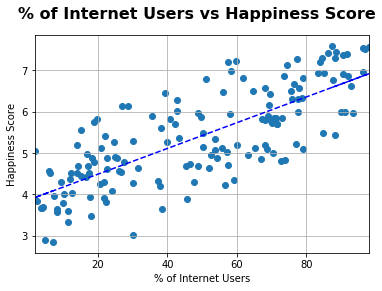

In [74]:
int_users = tech_vs_happiness_data['% of Internet Users']
hap_score = tech_vs_happiness_data['Happiness Score']
x_axis = int_users
y_axis = hap_score
(slope_int, intercept_int, _,_ , _) = linregress(x_axis,y_axis)
fit = slope_int * x_axis + intercept_int

#fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, sharex=True)
fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("% of Internet Users vs Happiness Score", fontsize=16, fontweight="bold")

ax1.set_xlim(min(int_users), max(int_users))

ax1.scatter(int_users, hap_score , marker="o")
ax1.plot(x_axis, fit, 'b--', label='y={:.2f}x+{:.2f}'.format(slope_int,intercept_int))

#ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Happiness Score")
ax1.set_xlabel("% of Internet Users")
plt.grid()

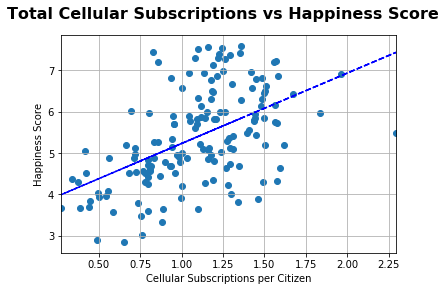

In [85]:
total_cell = tech_vs_happiness_data['Cellular Subscriptions per Citizen']
x_axis = total_cell
y_axis = hap_score
(slope_int, intercept_int, _,_ , _) = linregress(x_axis,y_axis)
fit = slope_int * x_axis + intercept_int

#fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, sharex=True)
fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("Total Cellular Subscriptions vs Happiness Score", fontsize=16, fontweight="bold")

ax1.set_xlim(min(total_cell), max(total_cell))

ax1.scatter(total_cell, hap_score , marker="o")
ax1.plot(x_axis, fit, 'b--', label='y={:.2f}x+{:.2f}'.format(slope_int,intercept_int))

#ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Happiness Score")
ax1.set_xlabel("Cellular Subscriptions per Citizen")
plt.grid()